<h1 style="text-align: center;">Northmade - A business shoes company</h1>


### A. Black shoes 
### B. Blue shoes
### C. Grey shoes

### **Business Metric: Revenue/month**  



**Objective:** The data from the Finance department contains measurements from the 3 models that all have the same expected business metric. We will compare each system with each other to get the system with the highest business metric. 

The only difference between the shoes is the color.
  
Procedure is as follows:
- Comparing B model with A and getting the best one.
- Comparing the best model from the Step 1 with C. 

In [36]:
import pandas as pd
import numpy as np
from seaborn import heatmap
import matplotlib.pyplot as plt

data = {
    'A': [787.566845, 849.783872, 790.7849529, 755.452438, 844.0504562, 754.5970365, 754.5970365, 779.4426814,
          794.1305422, 822.4688345, 878.5650778, 853.0049264, 882.8223293, 849.2436119, 890.4419083, 835.9374302,
          858.6096957, 872.6627148, 925.7498843, 944.475508, 816.1412015, 874.633087, 911.8743979, 710.2277186,
          933.2795765, 844.199621, 928.9486661, 819.5891931, 785.8549693, 859.0326405],
    'B': [1074.355555, 976.0369549, 956.9394044, 1014.403288, 1071.424683, 788.1655787, 788.1655787, 1082.903731,
          915.7997216, 873.5415175, 936.5139149, 1074.167661, 822.2390942, 991.9011476, 904.0925952, 986.3803468,
          959.0438724, 1020.697266, 1021.760286, 914.7192137, 983.6530678, 983.2136562, 875.5295582, 1172.532832,
          934.6868446, 1025.692976, 1060.632411, 901.443274, 914.6980546, 1049.93072],
    'C': [1113.547167, 1092.748993, 1101.745521, 956.4794001, 1166.438812, 987.0505796, 987.0505796, 1136.302045,
          1051.017214, 1133.701661, 1024.571656, 903.8918213, 925.3957697, 922.3171227, 923.5031523, 910.4770208,
          881.9081342, 1008.187626, 965.563162, 929.1346923, 1026.806046, 1067.657099, 1075.617459, 914.8664954,
          959.9984324, 1026.429243, 1106.964351, 1090.926857, 1056.128004, 994.1602395]
}

df = pd.DataFrame(data)
df.head()

,A,B,C
0,787.566845,1074.355555,1113.547167
1,849.783872,976.036955,1092.748993
2,790.784953,956.939404,1101.745521
3,755.452438,1014.403288,956.479400
4,844.050456,1071.424683,1166.438812


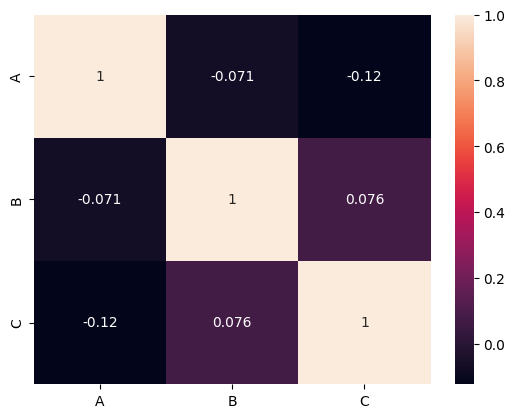

In [18]:
heatmap(df.corr(), annot=True);

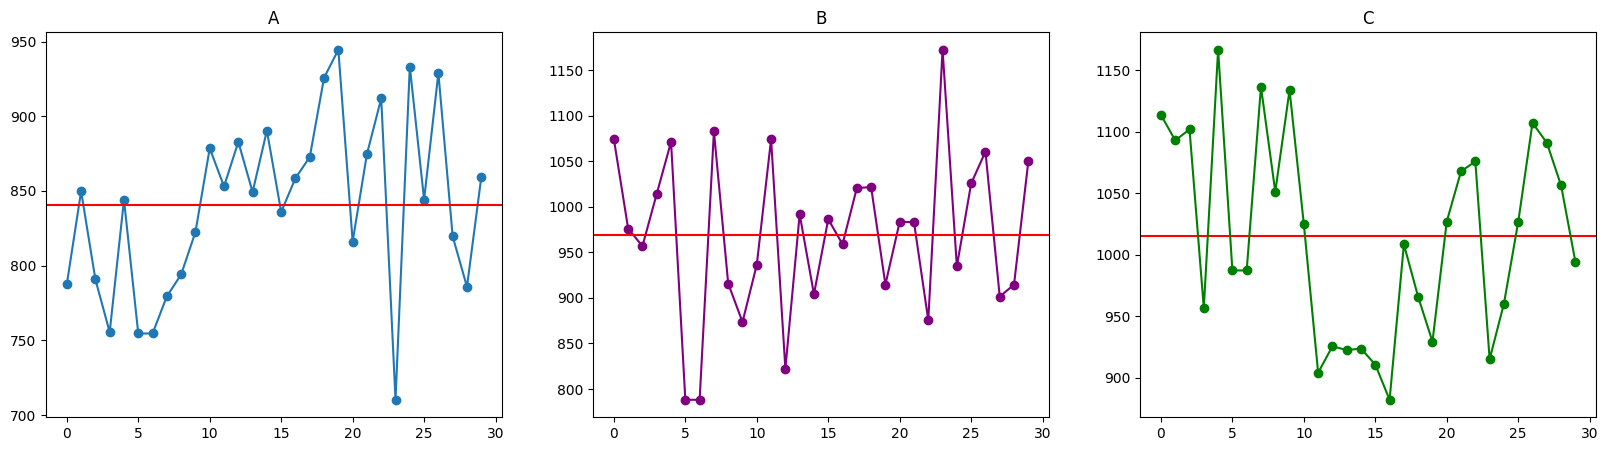

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].plot(df.A, "o-")
axs[0].set_title("A")
axs[0].axhline(df.A.mean(), color='red')
axs[1].plot(df.B, "o-", color='purple')
axs[1].set_title("B")
axs[1].axhline(df.B.mean(), color='red')
axs[2].set_title("C")
axs[2].axhline(df.C.mean(), color='red')
axs[2].plot(df.C, "o-", color='green');

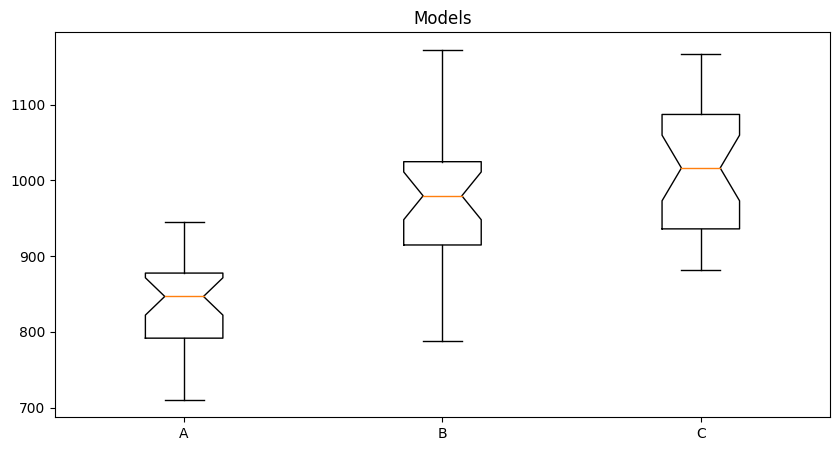

In [20]:
plt.figure(figsize=(10, 5))
plt.title("Models")
plt.boxplot(df, "o")
plt.xticks(ticks = [1, 2, 3], labels=['A', 'B', 'C'])
plt.show()

#### The models doesn't have any outliers and also represent the same standard error.

## Design

This is an A/B/C Test with 3 arms.
We define the number of N values needed for the 3 arms.

In [21]:
# Number of individual measurements we have
num_obs = len(df)
num_obs

30

We assume that the team's goal is to get a 3% increase in performance compared with the current system (System A). If we get at least half of this goal achieved, it is still a win. So PS is:

In [22]:
PS = 0.03*(1/2)*df.A.mean()
print("Practical Significance: ", PS)

Practical Significance:  12.604084426714918


In [23]:
#We calculate the minimum number of observations (N) needed to prove the hypothesis to optimize both the experiment cost and its reliablity.

se_a = df.A.std()/np.sqrt(num_obs)
se_b = df.B.std()/np.sqrt(num_obs)
se_c = df.C.std()/np.sqrt(num_obs)

se_delta_bar = np.sqrt(se_a**2 + se_c**2)

N = int((2.5 * se_delta_bar / PS)**2)
print("Minimum number of observations requried: ", N)

Minimum number of observations requried:  13


In [24]:
num_obs > N

True

**Comment:** We have enough values to have a low false-negative rate (below 20% of chances) and a low false-positive rate (below 5% of chances).

## Measurement

In [25]:
mean_a = df.A.mean()
print('Mean of System A: ', mean_a)

Mean of System A:  840.2722951143279


In [26]:
mean_b = df.B.mean()
print('Mean of System B: ', mean_b)

Mean of System B:  969.1754935045618


In [27]:
mean_c = df.C.mean()
print('Mean of System C: ', mean_c)

Mean of System C:  1014.6862118798144


## Analysis: Comparison of A and C

In [28]:
delta_bar = mean_c - mean_a
print('Value of Delta Bar: ', delta_bar)

Value of Delta Bar:  174.41391676548653


In [29]:
se_delta_bar = np.sqrt(se_a**2 + se_c**2)
print('SE of Delta Bar: ', se_delta_bar)

SE of Delta Bar:  18.45705571464012


In [30]:
if delta_bar > PS:
    print("Practical Significance is passed")
else:
    print("Practical Significance is failed")

Practical Significance is passed


In [31]:
if (delta_bar/se_delta_bar) >= 1.64:
    print("Statistical Significance is passed")
else:
    print("Statistical Significance is failed")

Statistical Significance is passed


## Comparison of C and B

In [33]:
delta_bar = mean_c - mean_b
print(f'Value of Delta Bar: {delta_bar}\n')

se_delta_bar = np.sqrt(se_b**2 + se_c**2)
print(f'SE of Delta Bar: {se_delta_bar}\n')


N = int((2.5 * se_delta_bar / PS)**2)
print(f"Minimum number of observations: {N} \n")

if delta_bar > PS:
    print("Practical Significance passed \n")
else:
    print("Practical Significance failed\n")

se_delta_bar = np.sqrt(se_b**2 + se_c**2)

if (delta_bar/se_delta_bar) >= 1.64:
    print("Statistical significance passed \n ")
else:
    print("Statistical significance failed  \n ") 


Value of Delta Bar: 45.51071837525262

SE of Delta Bar: 22.286972247131512

Minimum number of observations: 19 

Practical Significance passed 

Statistical significance passed 
 


# Conclusion

**We conclude that it is reasonable to replace System A with System C as it's mean is higher and it passes the statistical significane and also has practical significance of greater than least half the annual objective of 2%.**


## We've enough statistical and pratical evidence to replace shoes with Black color to Grey color which will evetually increase the revenue of the company.